## **3.3 IMDB Reviews Sentimental Analysis**
With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This sort of analysis is called **Sentiment Analysis**. 

The IMDb reviews dataset is
the “hello world” of natural language processing: it consists of 50,000 movie reviews
in English (25,000 for training, 25,000 for testing) extracted from the famous Internet
Movie Database, along with a simple binary target for each review indicating whether
it is negative (0) or positive (1). In this project we will build a **Sentiment Classification**

### **Import and load data**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
datasets, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

### **Preprocess data for training and testing**
- split data into training and testing
- create lists for sentences and labels (for data to be copied into)
- copy data into lists: iterate through list for train_data and test_data
- convert labels into numpy arrays-these will be used for training and testing network
- print training and testing data


In [ ]:
# taining and testing from datasets
train_data = datasets['train']
test_data = datasets['test']

# training sentences and labels lists
training_sentences =[]
training_labels =[]
testing_sentences =[]
testing_labels =[]

# iterate through list for train_data and test_data
for s,l in train_data:
  training_sentences.append(s.numpy())
  training_labels.append(l.numpy())
  

for s,l in test_data:
  testing_sentences.append(s.numpy())
  testing_labels.append(l.numpy())

# convert labels into numpy arrays-these is for training and testing network
training_labels_final = np.array(training_labels)   
training_sentences_final = np.array(testing_labels)    

print(len(train_data))
print(len(test_data))

25000
25000


Pandas dataframe.keys() function returns the ‘info axis’ for the pandas object. If the pandas object is series then it returns index. If the pandas object is dataframe then it returns columns.
- get the information from the dataset

In [ ]:
datasets.keys()

dict_keys(['test', 'train', 'unsupervised'])

### **Preprocessing movie review data**
It starts by truncating the reviews, keeping only the first 300 characters of each: this
will speed up training, and it won’t impact performance too much because you can
generally tell whether a review is positive or not in the first sentence or two. Then it
uses regular expressions to replace <br /> tags with spaces, and to replace any characters
other than letters and quotes with spaces. For example, the text "Well, I
can't<br />" will become "Well I can't". Finally, the preprocess() function
splits the reviews by the spaces, which returns a ragged tensor, and it converts this
ragged tensor to a dense tensor, padding all reviews with the padding token "<pad>"
so that they all have the same length.
- iterate x_batch and y_batch in dataset
- create preprocess function
- preprocess x_batch, y_batch

In [ ]:
# iterate x_batch and y_batch in dataset
for X_batch, y_batch in datasets["train"].batch(2).take(1):
    for review, label in zip(X_batch.numpy(), y_batch.numpy()):
        print("Review:", review,"...")
        print("Label:", label, "= Positive" if label else "= Negative")
        print()

Review: b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it." ...
Label: 0 = Negative

Review: b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the f

### **Preprocessing data**
- Hyperparameters: value set before ML process
- Tokenize sentences: tokenizer creates sequences
- fit_on_texts method: encodes data, tokenize a list of sentence
- word_index key value pairs: the key is the word, and the value is the token for that word.
- <00V> out of vocabulary words: words not in index
- texts_to_sequences(sentences): encodes sentences from fit_on_text



### **Adding parameters**
let’s truncate the vocabulary, keeping only the
10,000 most common words with maximum length of 120 with truncating type being post and embedding dimension of 16

In [ ]:
# parameters

vocab_size=10000
oov_tok = "<OOV>"
max_length = 120
trunc_type = "post"
embedding_dim = 16

#num_words, fit_on_text, word_index, sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences) # encodes data: tokenize a list of sentence
word_index = tokenizer.word_index # split words into text and integers
sequences = tokenizer.texts_to_sequences(training_sentences) # encodes sentences
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)



### **Build (layers)compile neural network model**
Now we're ready to build our simple neural network. We'll start by defining the type of model we want to build. We are going to uses a Sequential model which defines a sequence of layers in the neural network.
Next we simply add the input-, hidden- and output-layers. Between them, we are using dropout to prevent overfitting. The first layer is an Embedding layer, which will convert word IDs into embeddings. The embedding matrix needs to have one row per word
ID (vocab_size, embedding_dim, input_length=max_length) and one column per embedding dimension.
      
    Sigmoid network predict values between 0 and 1 probability.
    Softmax takes a set of values, and effectively picks the biggest one
    Relu > 0
    last Dense Layer is the output layer where we use the sigmoid function


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3, noise_shape=None, seed=None),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


### **Train(fit) neural network**
Now we compile our model, which is nothing but configuring the model for training. We use the “adam” optimizer, an algorithm that changes the weights and biases during training. We also choose binary-crossentropy as loss (because we deal with binary classification) and accuracy as our evaluation metric.

In [ ]:
history = model.fit(padded,
          training_labels_final,
          epochs=10,validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0210 - acc: 0.9924 - val_loss: 0.7967 - val_acc: 0.8244
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0187 - acc: 0.9932 - val_loss: 0.8405 - val_acc: 0.8216
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0166 - acc: 0.9942 - val_loss: 0.8823 - val_acc: 0.8213
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0155 - acc: 0.9944 - val_loss: 0.8894 - val_acc: 0.8268
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0164 - acc: 0.9946 - val_loss: 0.9232 - val_acc: 0.8214
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0153 - acc: 0.9940 - val_loss: 0.9263 - val_acc: 0.8191
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0176 - acc: 0.9937 - val_loss: 0.9638 - val_acc: 0.8142
Epoch 8/10
782/782 [==============================] - 5s 6ms/step - loss: 0.

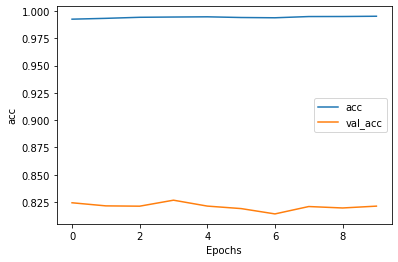

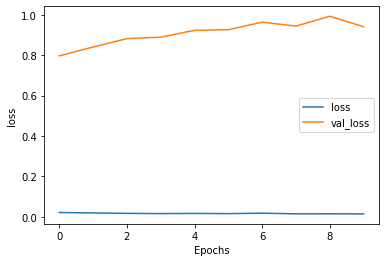

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

### **Evaluate model**
- And let's see how the model performs. Two values will be returned. Loss and accuracy.
- Display the test accuracy score

In [ ]:
# Evaluate model
print("Test-Accuracy:", np.mean(history.history["val_acc"]))

Test-Accuracy: 0.8210559964179993


With this model we got an accuracy of about 82%. the model performed well on the test.